In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

simpleclean = pd.read_csv("origin_simpleclean.csv", names=["origin", "cleaned"], header=None)
simpleclean["header"] = simpleclean["origin"].apply(lambda x : "0" if x[:5] == "https" else ("1" if x[:5] == "http:" else "2"))
simpleclean

,origin,cleaned,header
0,http://017uk.cf/2015/07/,017ukcf201507,1
1,http://1000.menu/catalog/pasternak,1000menucatalogpasternak,1
2,http://1007.show758.com/,1007show758com,1
3,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,1008643rmsncomldDvQPxAuuXlOKv4UvMDiEi4jVUCUwsO...,1
4,http://1019ampradio.cbslocal.com/tag/johnny-gi...,1019ampradiocbslocalcomtagjohnnygill2,1
...,...,...,...
60740,https://zh.wikipedia.org/wiki/Category:%E8%82%...,zhwikipediaorgwikiCategoryE882B2E7A9BAE59CB0E7...,0
60741,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,zhwikipediaorgzhhkE5A19EE588A9E7B1B3E880B6E6B8...,0
60742,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,zhwikipediaorgzhtwE6ADA3E7BEA9E881AFE79B9F,0
60743,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,zhwiktionaryorgwikiD181D0BDD0BED188D0B5D0BDD0B...,0


In [2]:
spookyhash = pd.read_csv("hash128bit.csv", names=["cleaned", "spooky"], header=None)
spookyhash

,cleaned,spooky
0,017ukcf201507,146905545972719139461626398464943762714
1,1000menucatalogpasternak,11400732409582248620542939390602423612
2,1007show758com,1022283822073093730015007784414130830624
3,1008643rmsncomldDvQPxAuuXlOKv4UvMDiEi4jVUCUwsO...,621138089423412442212836540337715596993
4,1019ampradiocbslocalcomtagjohnnygill2,766006891505003996815505329469509493758
...,...,...
60740,zhwikipediaorgwikiCategoryE882B2E7A9BAE59CB0E7...,124644648186736267008385642793329001284
60741,zhwikipediaorgzhhkE5A19EE588A9E7B1B3E880B6E6B8...,76600554314100005716269666035920117589
60742,zhwikipediaorgzhtwE6ADA3E7BEA9E881AFE79B9F,57864242707478732214955143020953637780
60743,zhwiktionaryorgwikiD181D0BDD0BED188D0B5D0BDD0B...,16908658670820555384699586090484029096


In [3]:
spookyhash["origin"] = simpleclean.origin
spookyhash.spooky = simpleclean.header + spookyhash.spooky
spookyhash["oringin size"] = spookyhash.origin.apply(lambda x : len(x))
spookyhash["cleaned size"] = spookyhash.cleaned.apply(lambda x : len(x))
spookyhash["hashed spooky size"] = spookyhash.spooky.apply(lambda x : len(x))
spookyhash

,cleaned,spooky,origin,oringin size,cleaned size,hashed spooky size
0,017ukcf201507,1146905545972719139461626398464943762714,http://017uk.cf/2015/07/,24,13,40
1,1000menucatalogpasternak,111400732409582248620542939390602423612,http://1000.menu/catalog/pasternak,34,24,39
2,1007show758com,11022283822073093730015007784414130830624,http://1007.show758.com/,24,14,41
3,1008643rmsncomldDvQPxAuuXlOKv4UvMDiEi4jVUCUwsO...,1621138089423412442212836540337715596993,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,236,207,40
4,1019ampradiocbslocalcomtagjohnnygill2,1766006891505003996815505329469509493758,http://1019ampradio.cbslocal.com/tag/johnny-gi...,51,37,40
...,...,...,...,...,...,...
60740,zhwikipediaorgwikiCategoryE882B2E7A9BAE59CB0E7...,0124644648186736267008385642793329001284,https://zh.wikipedia.org/wiki/Category:%E8%82%...,75,50,40
60741,zhwikipediaorgzhhkE5A19EE588A9E7B1B3E880B6E6B8...,076600554314100005716269666035920117589,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,94,60,39
60742,zhwikipediaorgzhtwE6ADA3E7BEA9E881AFE79B9F,057864242707478732214955143020953637780,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,67,42,39
60743,zhwiktionaryorgwikiD181D0BDD0BED188D0B5D0BDD0B...,016908658670820555384699586090484029096,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,79,51,39


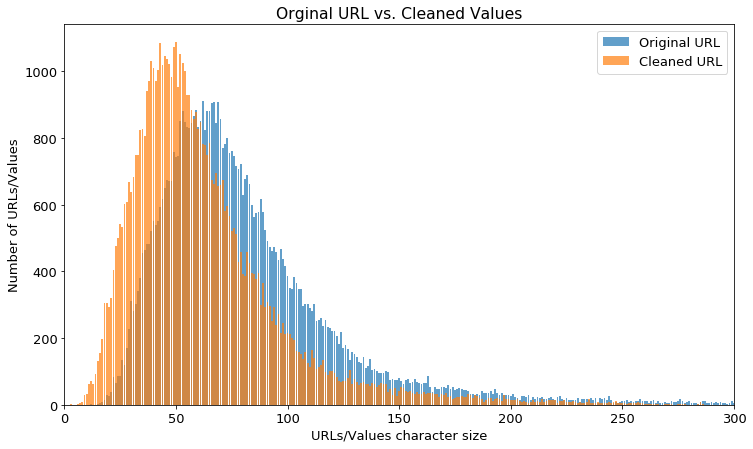

In [4]:
import matplotlib 
import matplotlib.pyplot as plt
font = {'size' : 13}

plt.rc('font', **font)

plt.figure(figsize=(12,7))
plt.xlabel('URLs/Values character size')
plt.title("Orginal URL vs. Cleaned Values")
plt.ylabel('Number of URLs/Values')
plt.xlim(right = 300)
plt.bar(list(spookyhash.groupby("oringin size").count().index), list(spookyhash.groupby("oringin size")["cleaned"].count()), alpha = 0.7)
plt.bar(list(spookyhash.groupby("cleaned size").count().index), list(spookyhash.groupby("cleaned size")["cleaned"].count()), alpha = 0.7)
plt.legend(('Original URL', 'Cleaned URL'))
plt.savefig('graphs/original_vs_cleaned_length.png')

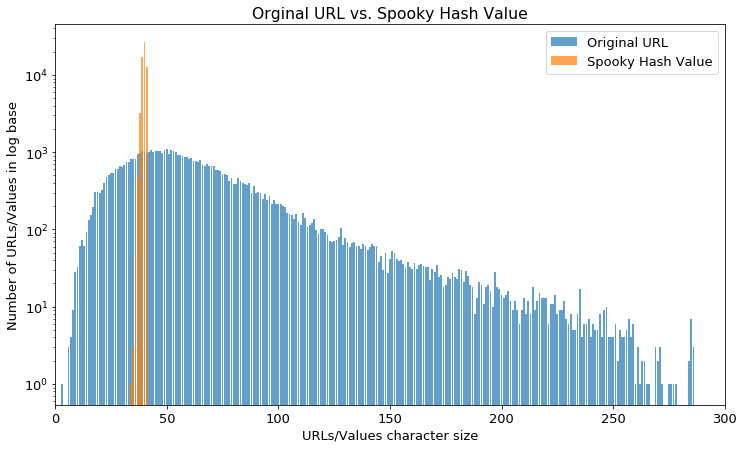

In [5]:
import matplotlib 
import matplotlib.pyplot as plt
font = {'size' : 13}

plt.rc('font', **font)

plt.figure(figsize=(12,7))
plt.xlabel('URLs/Values character size')
plt.title("Orginal URL vs. Spooky Hash Value")
plt.ylabel('Number of URLs/Values in log base')
plt.xlim(right = 300)
# plt.xscale("log")
plt.yscale("log")
plt.bar(list(spookyhash.groupby("cleaned size").count().index), list(spookyhash.groupby("cleaned size")["cleaned"].count()), alpha = 0.7)
plt.bar(list(spookyhash.groupby("hashed spooky size").count().index), list(spookyhash.groupby("hashed spooky size")["cleaned"].count()), alpha = 0.7)
plt.legend(('Original URL', 'Spooky Hash Value'))
plt.savefig('graphs/original_vs_spookyhash_length.png')

In [6]:
import pandas as pd
import re

simplehash = pd.read_csv("origin_simplehash.csv", names=["origin", "hashed"], header=None)
simplehash

,origin,hashed
0,http://017uk.cf/2015/07/,1lg017uk
1,http://1000.menu/catalog/pasternak,1hz1000
2,http://1007.show758.com/,18jshow7581007
3,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,18jmsnr1008643
4,http://1019ampradio.cbslocal.com/tag/johnny-gi...,18jcbslocal1019ampradio
...,...,...
60740,https://zh.wikipedia.org/wiki/Category:%E8%82%...,0hvwikipediazh
60741,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,0hvwikipediazh
60742,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,0hvwikipediazh
60743,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,0hvwiktionaryzh


In [7]:
simplehash["oringin size"] = simplehash.origin.apply(lambda x : len(x))
simplehash["hashed size"] = simplehash.hashed.apply(lambda x : len(x))
simplehash

,origin,hashed,oringin size,hashed size
0,http://017uk.cf/2015/07/,1lg017uk,24,8
1,http://1000.menu/catalog/pasternak,1hz1000,34,7
2,http://1007.show758.com/,18jshow7581007,24,14
3,http://1008643.r.msn.com/?ld=DvQPxAuuX-lOKv4Uv...,18jmsnr1008643,236,14
4,http://1019ampradio.cbslocal.com/tag/johnny-gi...,18jcbslocal1019ampradio,51,23
...,...,...,...,...
60740,https://zh.wikipedia.org/wiki/Category:%E8%82%...,0hvwikipediazh,75,14
60741,https://zh.wikipedia.org/zh-hk/%E5%A1%9E%E5%88...,0hvwikipediazh,94,14
60742,https://zh.wikipedia.org/zh-tw/%E6%AD%A3%E7%BE...,0hvwikipediazh,67,14
60743,https://zh.wiktionary.org/wiki/%D1%81%D0%BD%D0...,0hvwiktionaryzh,79,15


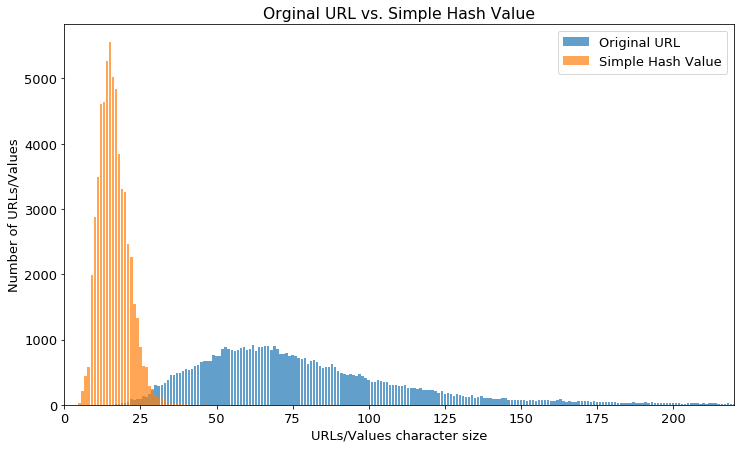

In [8]:
import matplotlib 
import matplotlib.pyplot as plt
font = {'size' : 13}

plt.rc('font', **font)

plt.figure(figsize=(12,7))
plt.xlabel('URLs/Values character size')
plt.title("Orginal URL vs. Simple Hash Value")
plt.ylabel('Number of URLs/Values')
plt.xlim(right = 220)
plt.bar(list(simplehash.groupby("oringin size").count().index), list(simplehash.groupby("oringin size")["hashed size"].count()), alpha = 0.7)
plt.bar(list(simplehash.groupby("hashed size").count().index), list(simplehash.groupby("hashed size")["hashed size"].count()), alpha = 0.7)
plt.legend(('Original URL', 'Simple Hash Value'))
plt.savefig('graphs/original_vs_simplehash_length.png')